## MNIST Classification

sklearn.dataset package contains
- fetch_openml > to donwload real life dataset 
- load > to load small to y dataset 
- make_ > to generate fake dataset, useful for tests

In [2]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', as_frame=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


- fetch openml() function is abit unusual since by default it return the input as a pandas dataframe and the label as a pandas series 
- but the mnist contain images and dataframe are not ideal for that, so its preferable to set as_frame=False to get data as numpy array instead 

In [3]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- generated dataset usually return as an (X, y) tuple containing the input data and the targets, both as numpy array 

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

- there are 70.000 images 
- each image has 784 features, this because each image is 28x28 pixels 
- and each features represent one pixels intensirt from 0 to 255 

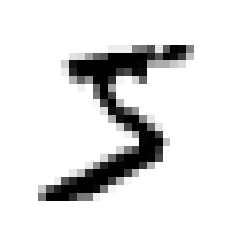

In [7]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    
some_digit = X[0]
plot_digit(some_digit)
plt.show()

- we ise cmap='binary' to get a gray scale color map where 0 is white and 255 is black 
- this lookk like a 5 and instead that what the label tell us is 5 

In [8]:
y[0]

'5'

- the training set is already shuffle for us, 
- which is good becayse this guarantees that all cross validation folds will be similar 
- moreover some learning algorithms are sensitive to the order of the training instance and they perform poorly id they get many similar instance in arow 
- shuffling the dataset ensure that this wont happen 

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a binary Classifier 

- lets try simplify problem for now and only try to identify one digit - for example the number 5 
- this 5 decorator will e an example of a binary classifier, capable distinguishing between just two classes, 5 ans non 5

- create the target vector for this classification task

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

- now lets star pick a classifier and train it 
- it good place to start with a stochastic gradient descent (SGD) classifier 
- capable of handling very large dataset efficienlt, because sgd delas with trainng instance independenlt, one at a time , and suited for online learning 

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

- the classifier guesses that this image represent a 5 (True) 
- lets evaluate this model performance 

### Performance Measures

### Measuing accuracy using cross-validation 

- lets evaluate use the corss val score function to evaluate our sgd classifier model 
- cross_val_score() using k fold cross validation with 3 folds.
- k-folds cross validation means splitting training set into k folds and then training the model k times 

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

- result above 95% accuracy on all cross validation folds?
- lets look at a dummy classifier that just classifier every single image in the most frequent class 
- which in this case is the negative class 

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # print false : no 5s detected 

False


- can you guess this model accuracy ?

In [15]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

- thats right, it has over 90% accuracy
- this is simply because only about 10% of the image are 5s 
- so if you always guess that an image is not a 5
- you will be right about 90% of the time 

- this demonstrate why accuracy is generally not the preferred performance measure for classifier 
- especialy when you are dealing with skewed dataset
- a much better way to evaluate the performanve of a classifier it to took at the confusion matrix 

### confusion matrics 

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

- just like cross val score 
- instead of returning the evakuation scores 
- it return the prediction made on each test fold 

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

- each row in confusion matrix represent an actual class 
- each column represent a predicted class 
- the first row of this matrix consider non 5 images(negative class) 53892
- the 687 were wrongly classified as false positive
- the secodn row consider the image of posiive class 
- 1891 were wrongly classsified as false negative 
- while remaining 3530 true positive 
- perfect classfieir would only have true positive and tru negative 


In [18]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

- precision =  TP/(TP+FP)
- recall = TP/(TP+FN)
- TN FP
- FN TP

Personal note:
- precision most likely measure result base on prediction, like how much we predict true from prediction. 
- recall mostly measure for how much true based on actual number 

- precission : accuracy of the positive prediction 
- recal : True Positive Rate (TPR) > ratio of positive instance that are correctly detected by the classifir 

- FP > the model predict 5 but actual in not 5 > membenarkan yang salah
- FN > the model predict not 5 but actual is 5 > menyalahkan yang benar 

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred )

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

- now our 5 detector does not look as shiny as it did when we looked ar its accuracy 
- when it claim an image represent a 5 it is correct only 83.7% of the time 
- moreover it only detect 65.1% of the 5s

- it is often convenient to combine precision and recall into a single metric called the F1 score 
- especialu when we need a single metric to compare two classifiers 
- the f1 score is the harmonic mean of precision and recall 
- where the regular mean tretas all value equally, the harminic means give much more weight to low values 
- as the result the classifier will only get a high f1 score if both recall and precision are high

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

the precison/recall trade off 
- you cant have it both ways : increasing predicion reduce recall and vice versa 
- to understand this trade off example is sgd classifier
- sgd classifier computes a score based a decision function 
- if that score is greater than a treshold it assign the instance to the peositive class and otherwise it assign to negative class 
- scikit learn does not let you set the treshold directly 

In [22]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [23]:
treshold=0
y_some_digit_pred = (y_score > treshold)

- sgd classifier uses a treshold equal to 0 
- so the preceding code return the same result as the predict method

In [24]:
treshold = 3000 
y_some_digit_pred = (y_score > treshold)
y_some_digit_pred

array([False])

- this confirm that raising the treshold decrease recall 
- the image actualy represent a 5 and the classifier detect it when the treshold is 0 
- but is misses it when the treshold is increased to 3000

how we decide which treshold to use?
- first use cross val predit functio to get the score of all instance in the training set 
- but this time specify that we want to return decision score instead of predictions

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

- with these score we use the precision recal surve functuon to compute precision and recall for all posible treshold 

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

- finaly we use matplotlib to plot precision and recall as function of the treshold value 


NameError: name 'threshold' is not defined

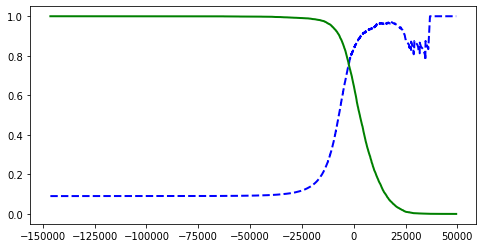

In [27]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
#save_fig("precision_recall_vs_threshold_plot")

plt.show()



- the reason why the presion curve is bumpier than the recall curve is that precision may cometimes go down when we raise thetreshold 

NameError: name 'threshold' is not defined

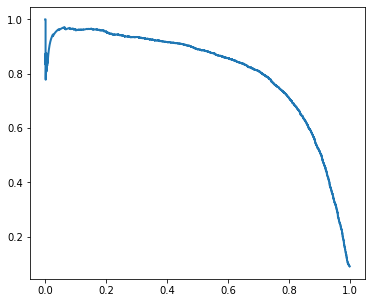

In [28]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")


idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")

plt.show()


- we can see that precision really starts to fall sharply at around 80% recall 
- we will probably want to selct a precision/recal trade off just befor that drop


- suppose we decide to aim 90% precision 
- we could use the first plot to find the treshold you need to use, but that not very precise 
- alternatively we can search for the lowest threshold that gives we at least 90% precision 

In [29]:
idx_for_90_precision = (precisions >= 0.90).argmax()
thresholds_for_90_precision = thresholds[idx_for_90_precision]
thresholds_for_90_precision

3370.0194991439594

- to make predictions on the training set for now, instead of calling the classifier predict method, we can this code 

In [30]:
y_train_pred_90 = (y_scores >= thresholds_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [31]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [33]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision


0.4799852425751706

- great we have 90% precision classifier 
- it is fairly easy to create a sclassifier with virtually any precision we want 
- just set a high enough hreshold and we are done 
- 48% recall would not be great at all 

- if someone say "lets reach 99% precision"
- we should ask "at what recall?"

### The ROC Curve 

- receiver operating characteristic curve is another common tool used with binary classifier 
- it s very similar to the precision/recal curve 
- but instead of plotting precision vs recall the roc curve plots the true positive rate (another name for recall) againt the false positive rate (fpr) 
- the fpr is the ratio of negative instances that are icorrectlr classified as positive 
- it is equal to 1 - the tru negative rate (tnr), which is the ratio of negative instance that are correctly classified as negative 
- tnr is also calles specificity 
- hence the roc curve plot sensitivity (Recall) versus 1-specificity 

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

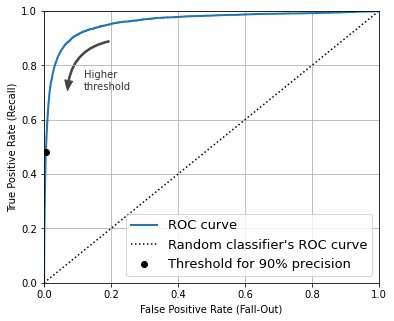

In [35]:
idx_for_threshold_at_90 = (thresholds <= thresholds_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
#save_fig("roc_curve_plot")

plt.show()


- the higher the recall (tpr), the more false positive(fpr) the classifier procuders 
- the dotted line represent the roc curver of a purely random classifier 
- a good classifier stays as far away from that line as possible 

- one way to compare classifiers is to measure the area under the curve (auc)
- a perfect classifier will have a roc auc equal to 1


In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores )

0.9604938554008616

How to decide ? 
- PR curve > if we more care about the false positive than the false negative 
- ROC curve > otherwise 

- lets now create a randomforest classifier whose pr cirve and f1 score can compare to those of the sgd classifier 

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

- rendom forest classifier class does not have a decision function method
- predic proba method that reurn class probabilities for each instance 
- we can juat use the probability of the positive class as a score 

In [38]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [39]:
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


- the model predict the first image is positive with 89% probability 
- predict second image is negative with 99% probability 

- these are estimated probabilities not actual probabilities
- the sklearn.calibrating package contain tools to calibrate the estimate probabilities and make them much closer to actual probabilities 

In [40]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

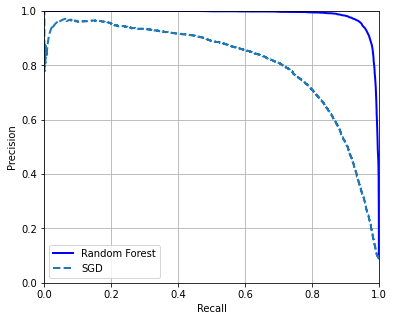

In [41]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
#save_fig("pr_curve_comparison_plot")

plt.show()


- random forest curve look much beter than sgd classifier, it comes closer to the top righ corner 
- it is f1 score and roc auc score are also significantly beter 


In [42]:
y_train_pred_forest = y_probas_forest[:,1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [44]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [45]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

### Multiclass classification 

- also called multinomial classifier can distinguish between more tahn two class 
- some scikil learn classifier (logistic regeressionm random forest classifier, and gaussian nb) are capable of handling multiple classes natively 
- other are stricly binary classifier (sgd classifierm and svc)

stratgy 1: one-versus-the-resy(OVR)
- one way to create a system that can classify the digit image into 10 class is to train 10 binary classifier, one foer each digit 
- then when we want to classify an image we get th decision score from each classfier for the image and we select the class whose classifier output the high score 
- this called the one-versus-the-resy(OVR) strategy or one versul all (ova)


strategy 2: one versus one (ovo)
- train a binary classifier for every pair of digit 
- one distinguis 0 and 1, another 0 adn 2, another 1 and 2 ans so on 
- if there a N class, we need to train N X(N-1)/2 classifier 
- for mnist problem these mean traing 45 binary classifier 
- the main advantages of vov is that each classifier only need to be trained on the part of the training set containing two classes that it mush distinguish

- scikit learn detect when we tray to use binary classification algorithm for a multiclass task and it automatically run OVR or OVO 
- deoending on the algorithm  

In [46]:
from sklearn.svm import SVC 

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

- scikit learn use the ovo straget and traine 45 binary classifier 

In [47]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

- thats correct 
- the code acctualu made 45 predictiosn - one per pair of classes - and it selected the class that won the mpst duels 


- if we call decision function method 
- it will return 10 score per instance, one per class 

In [48]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

- the highes socre os 9.3 
- and it is indeed the one corresponding to class 5 

In [49]:
class_id = some_digit_scores.argmax()
class_id

5

- when classifier is trained 
- it store the lsut of target classes in it classes_ attribute order by value 
- in the case of mnist the index of each class in the classes_ array conveniently matcher the class itself 
- but in general we wont be so lucky 
- we need to look up the classes label

In [50]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [51]:
svm_clf.classes_[class_id]

'5'

- if we want scikit learn to use one versus one or one versue the reest 
- we can use one versus classifier or one vs rest classifier classes 
- example this code create a multiclass classifier using the ovr strategy based on svc 

In [52]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [53]:
len(ovr_clf.estimators_)

10

- training an sgd classifier on a multiclass datset and using it to make predictions 

In [54]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

- that incorrect predict 
- error happen because scikit learn used the ovr strategy under the hood 


In [55]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

- the classifier is not very confident about its prediction 
- almost all scores are very negative while class 3 has a score +1824 and class 5 id not far behind at 1386 
- we use cross val score to evaluate model

In [56]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

- it get over 85.8% on all test folds 
- if we used random classifir we would get 10% accuracy 
- so thi is not such a bad score 
- but we can still do much better 

In [57]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

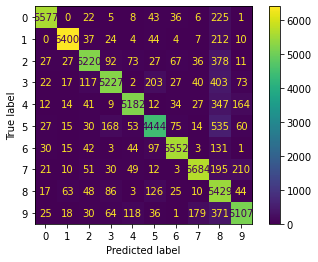

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

- most image are on the main diagonal which mean they were classified correctly
- the cell on the diagonal in row 5 adn col 5 look slighly darker than the other digits 
- this could be because the model made more error on 5, because there are fewer 5 in the dataset than the other digit 
- that way importtant to normalize the confusion matrix by dividing each value by the total number image in the coresponding(true) class

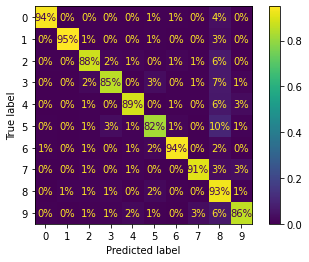

In [59]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()


- now we can easily see that only 82% of the image of 5 were classified correctly
- the most common error the model made with image of 5 was to misclassify them as 8 
- this happen for 10% of all 5, but only 8% got missclassified as 5 
- if we want to make the error stand out more, we can try putting zero weight on the correct prediction 

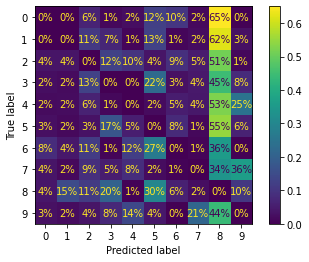

In [60]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

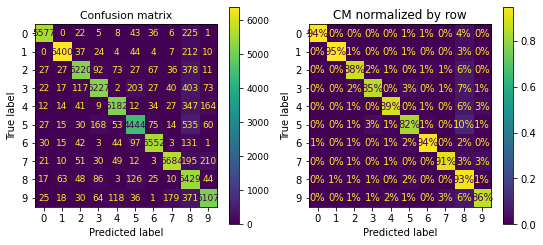

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
#save_fig("confusion_matrix_plot_1")
plt.show()


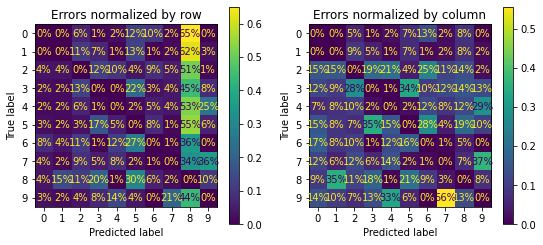

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
#save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)

- the column for class 8 is now really bright
- which confirms that many image got misclassified as 8 
- in fact this is the most common missclassification for almost all classes 

- looking at these plots, it seems that your efforts should be spen on reduing the flase 8


In [64]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


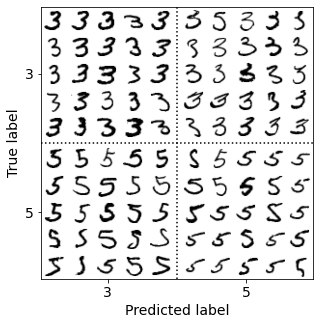

In [65]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
#save_fig("error_analysis_digits_plot")
plt.show()


- some digit that the classifier gets wrong

### Multilabel Classification 

- multiple binary tags is calles multilabel classification system 

predit number if number more than 7 (789) or number is ganjil 

In [66]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >='7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

- first indicate wheter or not the digit is large (7,8,9)
- indicate wheter or not it is odd(ganjil)

In [67]:
knn_clf.predict([some_digit])

array([[False,  True]])

- the digit 5 is indeed not largr and odd True

- one approach to measure the f1 score for each individual label 
- then simply compute the average score 

In [75]:
y_train_knn_predict = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_predict, average="macro")

0.976410265560605

- this approcah assumes that all labels are equally important 
- if we want give more weight to the classifier score on some class is to give each label a weight eual to its support 
- to do this simply set average ="weighted and calling f1 score function 

- if we want to use a classifier that does not natively support multilabel classification such as svc 
- one possible strategy is to train one model per label 
- this strategy may have a hard time capturing the dependencied betwen the labels
- to solve this isuse the model can be organized in a chain 
- when model make a prediction it use the input feature pluas all the prediction of the model that come before it in the chain 
- scikil learn chain classifier that does just that

In [76]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([some_digit])

array([[0., 1.]])

### Multi output classification

- multioutput multiclass classification 
- it is generalization of multilabel classification where each label can be multiclass (more that two possible values)


ilustrate
- lets build a system that remove noise from image 
- input a noisiy digit image 
- the output a clean digit image represent as an arra of pixel intensities 
- the classifier output is multilabel(one label per pixel) and each label have multiple value (pixel intensity range 0-255)

- multiouput system are not limited to classification task 

In [78]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train 
y_test_mod = X_test 

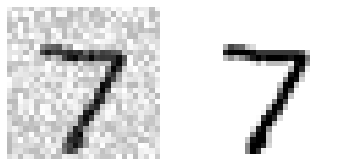

In [79]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
#save_fig("noisy_digit_example_plot")
plt.show()


- on the left is the noisy input image 
- on the right is the clean target image 

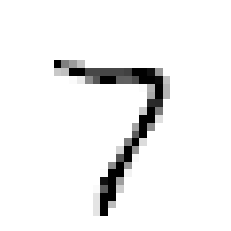

In [80]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()